In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import ttest_ind

data = pd.read_csv("ModernistLibraries.csv")

#since there is a strange column called 'Unnamed: 11' whose values are all empty, so I delete it.
del data["Unnamed: 11"]

data

,BookOwnerVIAFID,BookOwnerName,WorkID,BookID,BookTitle,BookAuthorName,BookPubDetails,BookPubDate,BookNotes,BookCollection,InformationSource
0,97006051,Ernest Hemingway,4650949,25197870,Sinistro and celebration: 19 poems,A.E.T.,1956,1956,NaN,Finca Vigia.,manual entry
1,97006051,Ernest Hemingway,4650967,25198046,Tauromaquia y taurogoga: Algunos concertos bsi...,R. Abarquero Durango,"Madrid: Torroba, 1959.",1959,NaN,Finca Vigia.,manual entry
2,97006051,Ernest Hemingway,429839,25198087,We pointed them North; recollections of a cowp...,Edward Charles Abbott,"Norman: University of Oklahoma Press [1955, c1...",1955,NaN,Finca Vigia.,Library of Congress
3,97006051,Ernest Hemingway,429839,25198220,We pointed them north; recollections of a cowp...,Edward Charles Abbott,"New York: Farrar & Rinehart, inc. [c1939]",1939,NaN,Finca Vigia.,Library of Congress
4,97006051,Ernest Hemingway,7785885,25198292,Japan unmasked,Hallett Edward Abend,"New York: I. Washburn, Inc., 1941.",1941,NaN,Finca Vigia.,Library of Congress
5,97006051,Ernest Hemingway,4651076,25198486,"El pase natural: origen, evolucin, critica",Edmundo Gonzlez Acebal,"Madrid: ""Los de Jos y Juan,"" n.d.",NaN,NaN,Finca Vigia.,manual entry
6,97006051,Ernest Hemingway,1247514,25198531,Sketches from life of men I have known,Dean Acheson,"New York: Harper, 1959.",1959,NaN,Mary Hemingway's personal library,Library of Congress
7,97006051,Ernest Hemingway,4651146,25198749,El mosaico y otras plagas de la fruta bomba,Julin Acua,"Santiago de las Vegas, Cuba: Estacin Experimen...",1949,NaN,Finca Vigia.,manual entry
8,97006051,Ernest Hemingway,4651155,25198793,Treason and tragedy : an account of French war...,George Adam,"London: J. Cape, 1929.",1929,NaN,"Big House, Key West",Library of Congress
9,97006051,Ernest Hemingway,4651175,25198887,A book about Paris,George Adam,"New York: Harcourt, Brace, 1928.",1928,NaN,"Pool House and Garage Apartment, Key West.",Library of Congress


In [3]:
#Book Owners contain people below. Show how many books different people own.
data['BookOwnerName'].value_counts()

Ernest Hemingway           7408
Virginia Woolf             5075
e.e. cummings              2603
W.B. Yeats                 2267
James Joyce                1197
Edna St. Vincent Millay    1183
Gertrude Stein              958
Edith Sitwell               857
Ezra Pound                  711
W.H. Auden                  329
F. Scott Fitzgerald         311
Flannery O'Connor           281
Langston Hughes             141
Name: BookOwnerName, dtype: int64

In [4]:
#use regular expression to search special strings
import re

bpd = data[' BookPubDate']
bpd_is_null = pd.isnull(bpd)

#print(bpd_is_null)
bpd_null_true = bpd[bpd_is_null == False]    # It's a boolean list

#My own dataframe.
dataframe = pd.DataFrame({'BookOwnerName':data[bpd_is_null == False]['BookOwnerName'].values,
                          'BookPubDate': bpd_null_true.values,   
                          'InformationSource':data[bpd_is_null == False]['InformationSource'].values,
                          'BookOwnerVIAFID':data[bpd_is_null == False]['BookOwnerVIAFID'].values,
                          'BookCollection':data[bpd_is_null == False][' BookCollection'].values,
                          'BookOwnerVIAFID':data[bpd_is_null == False]['BookOwnerVIAFID'].values,
                          'BookID':data[bpd_is_null == False]['BookID'].values,
                          'WorkID':data[bpd_is_null == False]['WorkID'].values
})


#Using regular expression to search special string characters.
k = 0
list =[]
for i in dataframe['BookPubDate']:
    p = re.compile(r'\D')  #every characters except digit 0-9 would be searched by this instruction.
    if p.search(i):
        list.append(k)
        #print(k)
    k += 1

#print(list)
dataframe.drop(list,inplace =True)

#transfer data type from object to int64
dataframe['BookPubDate']=dataframe['BookPubDate'].values.astype('int')
print('data type:',dataframe['BookPubDate'].dtype)

data type: int64


In [5]:
#print the top 5 book owners who own most books
print(data['BookOwnerName'].value_counts().head())

Ernest Hemingway    7408
Virginia Woolf      5075
e.e. cummings       2603
W.B. Yeats          2267
James Joyce         1197
Name: BookOwnerName, dtype: int64


Poems                                                   128
Selected poems                                           36
Collected poems                                          22
Ulysses                                                  16
Poem                                                     16
Collected Poems                                          12
Doy fe... un ao de actuacin en la Espaa nacionalista     10
Plays                                                    10
Selected Poems                                            9
Pomes Penyeach                                            8
Name: BookTitle, dtype: int64


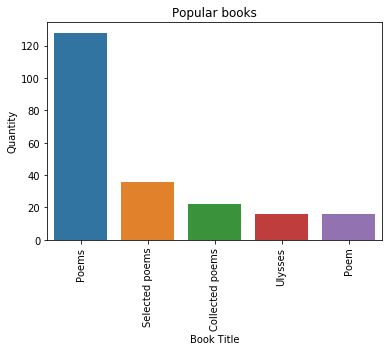

In [6]:
#print the five most popular book people own 
print(data['BookTitle'].value_counts().head(10))

#plot it in a chart
df = pd.DataFrame(data['BookTitle'].value_counts().head())

plt.figure(num=1)
sns.barplot(x=df.index,y = df.BookTitle,data=df)
plt.xticks(rotation = 90)
plt.xlabel('Book Title')
plt.ylabel('Quantity')
plt.title("Popular books")

(20782, 7)
(20778, 7)


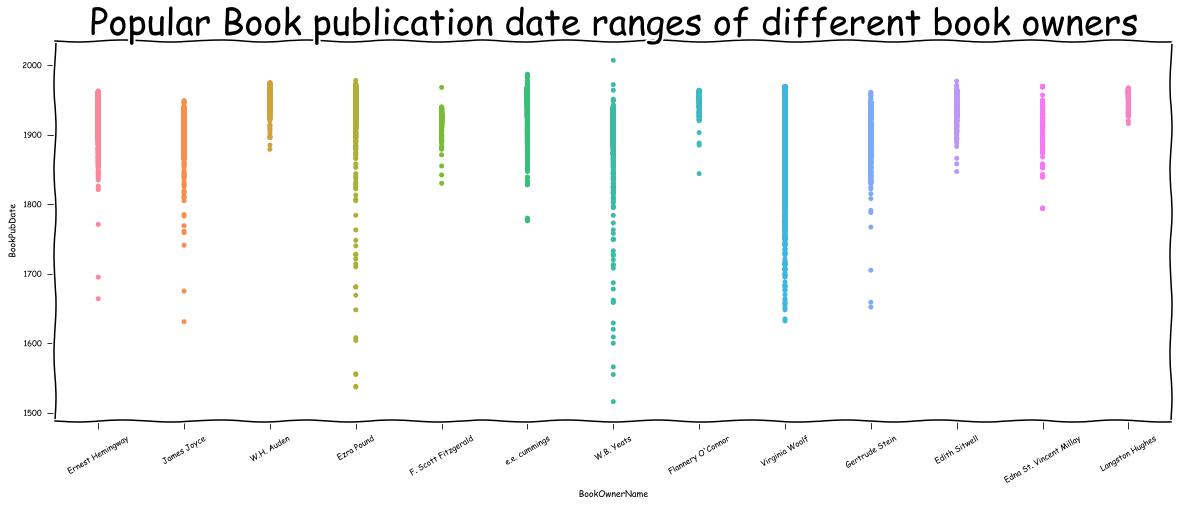

In [7]:
#Select valid date and create a new dataframe.
print(dataframe.shape) #before clean the data
new = dataframe.loc[(dataframe['BookPubDate']<=2017)&(dataframe['BookPubDate']>=1500)]
print(new.shape) #after clean the data

#Show what's the popular range of book publication dates for every book owners.
with plt.xkcd():
    sns.set_context('paper')
    plt.figure(num = None,figsize=(20,7))
    sns.stripplot(x='BookOwnerName',y='BookPubDate',data = new)
    plt.xticks(rotation=30)
    plt.title('Popular Book publication date ranges of different book owners', fontsize = 36)

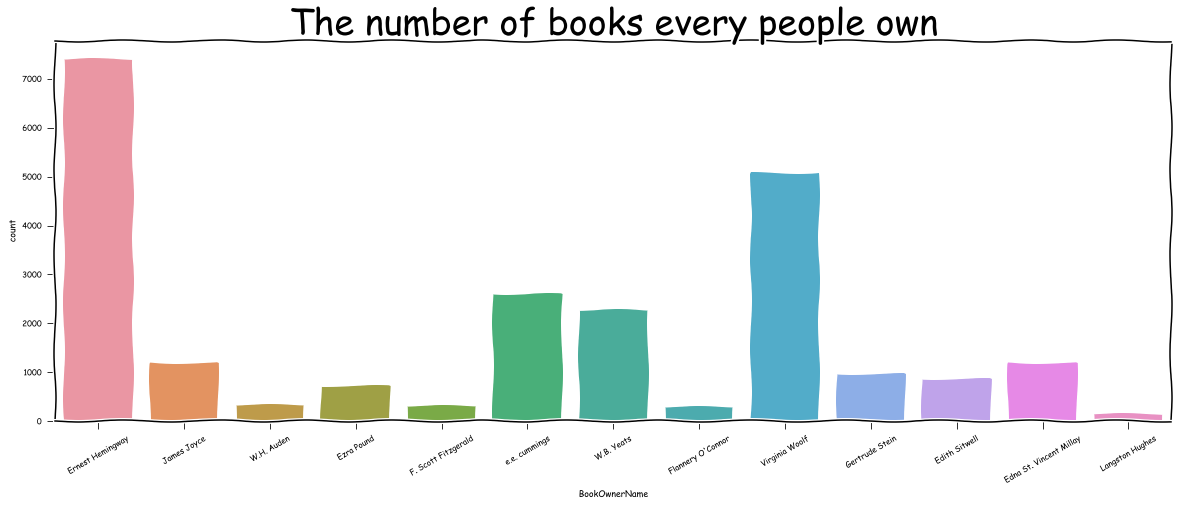

In [8]:
#use BookOwnerName to show how many books each book owner has
with plt.xkcd():
    plt.figure(num = None,figsize=(20,7))
    sns.set_context('paper')
    sns.countplot(x='BookOwnerName',data=data)
    plt.xticks(rotation=30)
    plt.title('The number of books every people own', fontsize = 36)

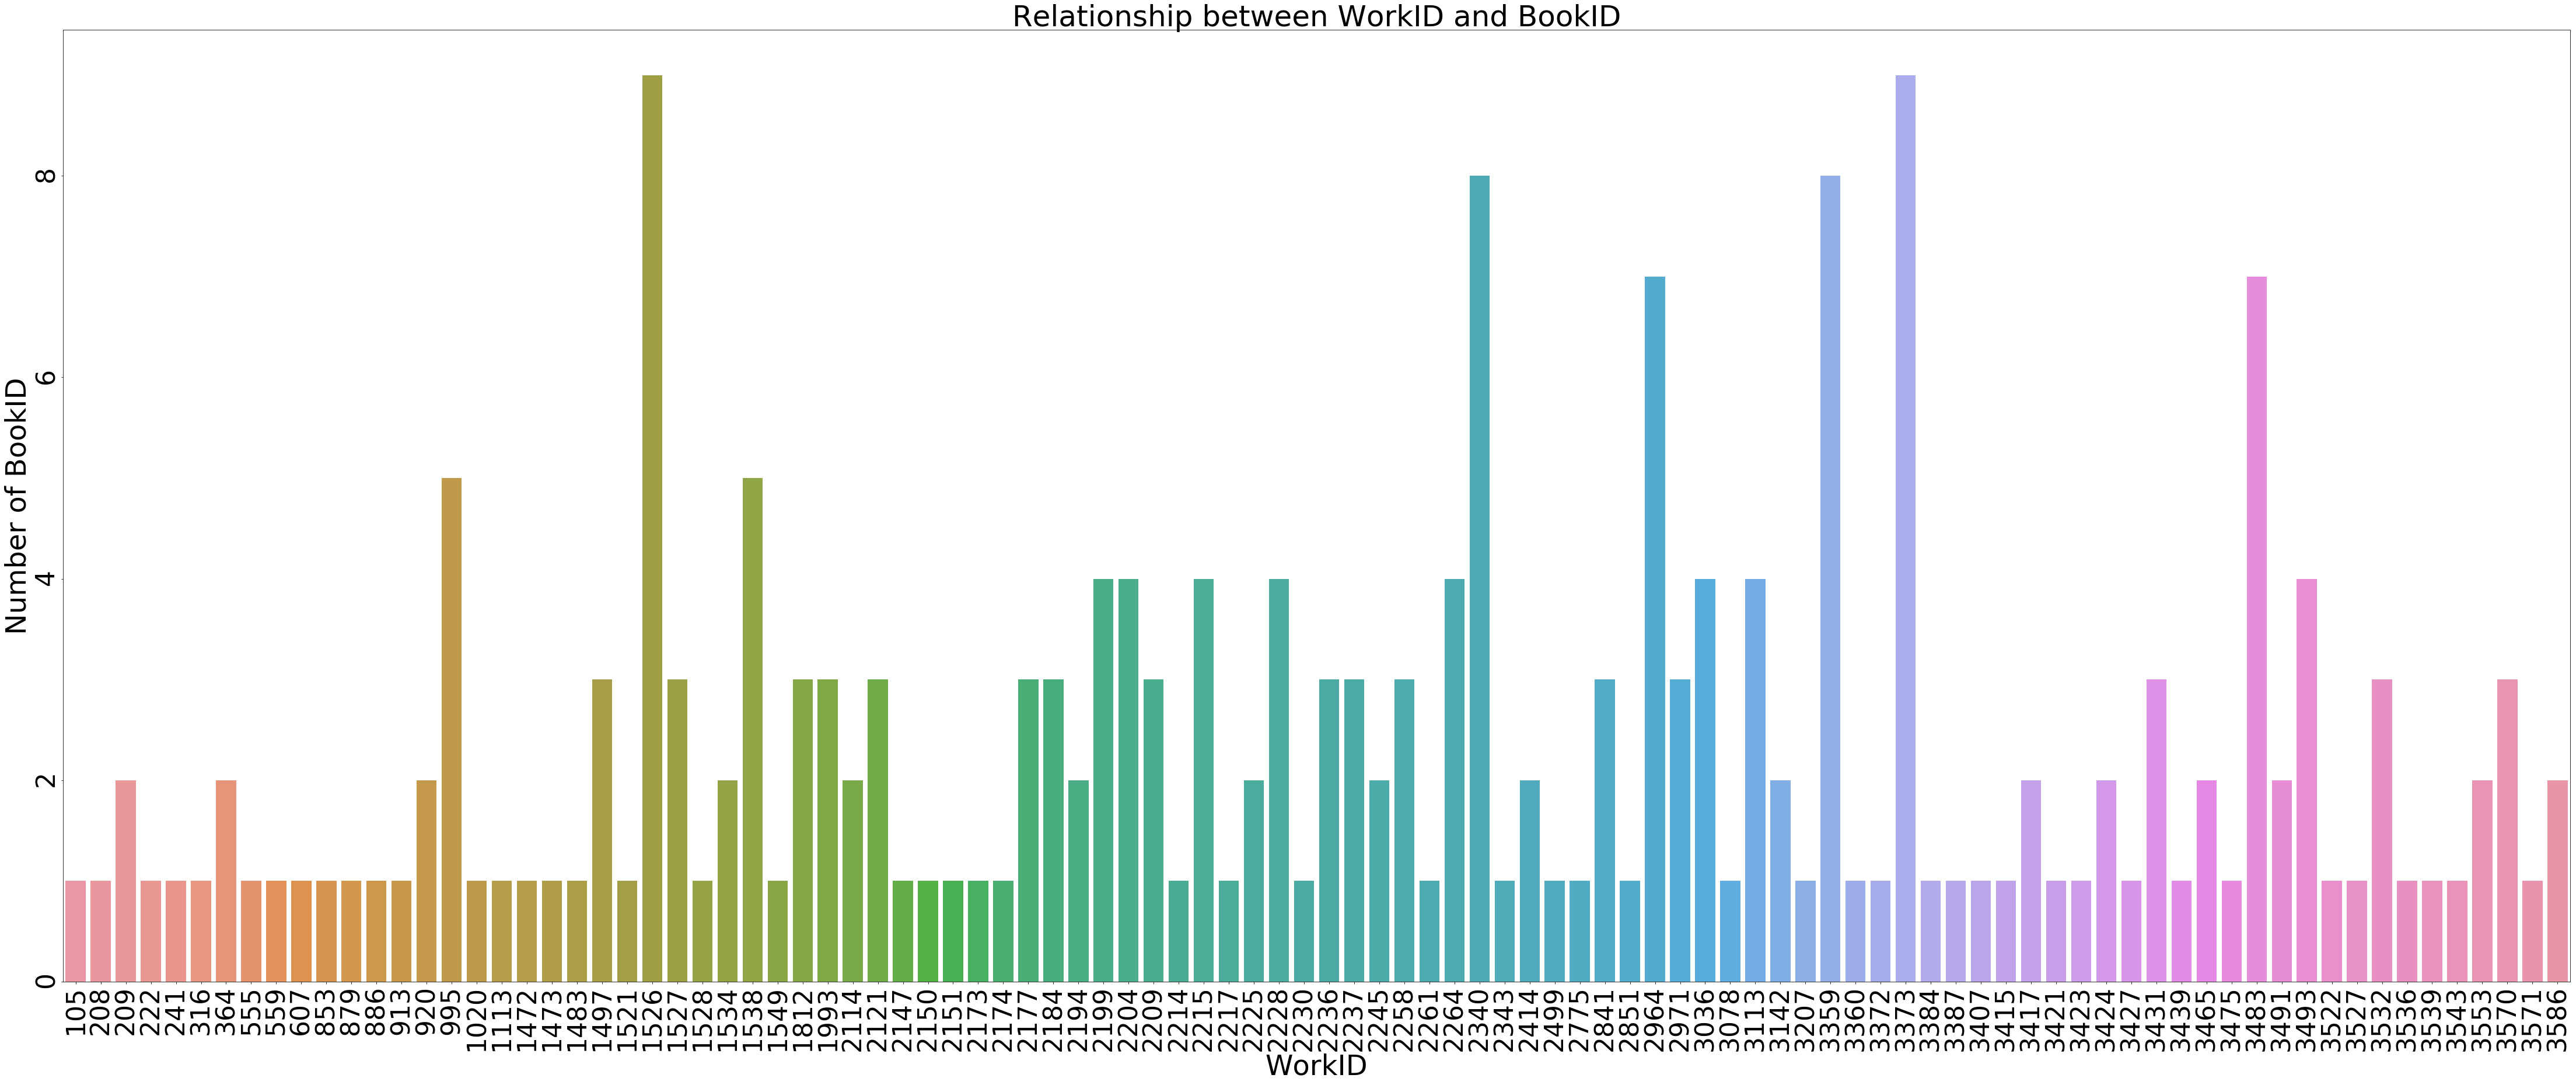

In [9]:
#To show the relationship between BookID and WorkID
grouped = data['BookID'].groupby([data['WorkID']])
df = pd.DataFrame(grouped.size())
df = df.head(100)

plt.figure(figsize=(77,30))
sns.barplot(x=df.index,y=df.BookID,data=df)
plt.xticks(rotation = 90,fontsize=44)
plt.yticks(rotation = 90,fontsize=44)
plt.xlabel('WorkID',fontsize= 48)
plt.ylabel('Number of BookID',fontsize= 48)
plt.title("Relationship between WorkID and BookID",fontsize=50)

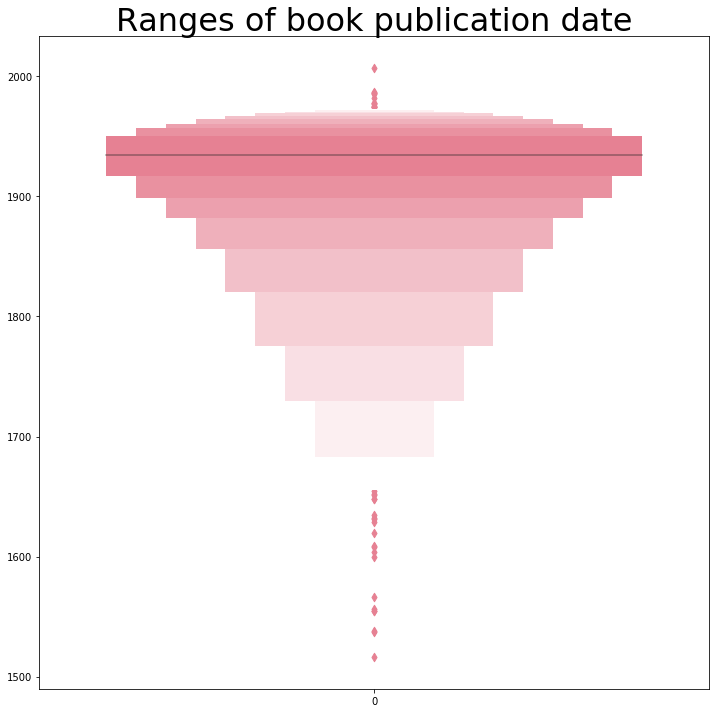

In [11]:
new2 = new['BookPubDate']

plt.figure(figsize=(12,12))
sns.lvplot(data=new2, scale="linear", palette="husl")
plt.title('Ranges of book publication date',fontsize =32)